In [61]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [62]:
from evaluation.utils.analyze import EvalFilesReader
from inference.inference_markers import predict_on_set
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [63]:
eval_file_reader = EvalFilesReader("/home/datagen/roey/expo_markers/evaluation_files")
df = eval_file_reader.read()

test_file_reader = EvalFilesReader("/home/datagen/roey/expo_markers/test_files")
df_test = test_file_reader.read()

display(df.head())
display(df_test.head())

,train_identifier,test_identifier,iteration_num,metrics
0,expo_real_1000_0_750,Expo_Real_1000_750-800,499,"{'bbox': {'AP': 85.12347044577064, 'AP50': 97...."
1,expo_real_1000_0_750,Expo_Real_DataGen_Office_250_0-50,499,"{'bbox': {'AP': 75.86112823424723, 'AP50': 89...."
2,expo_real_1000_0_750,Expo_Real_1000_750-800,999,"{'bbox': {'AP': 85.53087309706872, 'AP50': 98...."
3,expo_real_1000_0_750,Expo_Real_DataGen_Office_250_0-50,999,"{'bbox': {'AP': 77.67847541349337, 'AP50': 94...."
4,expo_real_1000_0_750,Expo_Real_1000_750-800,1499,"{'bbox': {'AP': 89.7543988622089, 'AP50': 99.3..."


,train_identifier,test_identifier,iteration_num,metrics
0,expo_real_1000_0_750,Expo_Real_1000_800-1000,24999,"{'bbox': {'AP': 94.0470842489253, 'AP50': 98.6..."
1,expo_real_1000_0_750,Expo_Real_DataGen_Office_250_50-250,9999,"{'bbox': {'AP': 85.19222128244404, 'AP50': 96...."
2,expo_synt_0_750,Expo_Real_1000_800-1000,1499,"{'bbox': {'AP': 63.206589089917166, 'AP50': 82..."
3,expo_synt_0_750,Expo_Real_DataGen_Office_250_50-250,52499,"{'bbox': {'AP': 78.59150085526744, 'AP50': 97...."


In [64]:
train_identifiers = df.train_identifier.unique()
test_identifiers = df.test_identifier.unique()

In [65]:
list(itertools.product(train_identifiers, test_identifiers))

[('expo_real_1000_0_750', 'Expo_Real_1000_750-800'),
 ('expo_real_1000_0_750', 'Expo_Real_DataGen_Office_250_0-50'),
 ('expo_synt_0_750', 'Expo_Real_1000_750-800'),
 ('expo_synt_0_750', 'Expo_Real_DataGen_Office_250_0-50'),
 ('expo_synt_v4_large_0_750', 'Expo_Real_1000_750-800'),
 ('expo_synt_v4_large_0_750', 'Expo_Real_DataGen_Office_250_0-50'),
 ('expo_synt_v4_2_0_750', 'Expo_Real_1000_750-800'),
 ('expo_synt_v4_2_0_750', 'Expo_Real_DataGen_Office_250_0-50')]

In [66]:
set_names_map = {
    "expo_real_1000_0_750": "Real_India_750",
    "expo_synt_0_750": "Synt_v3_750",
    "Expo_Real_1000_750-800": "Real_India_50",
    "Expo_Real_DataGen_Office_250_0-50": "Real_DGOffice_50",
    "expo_synt_v4_large_0_750": "Synt_v4_1_750",
    "expo_synt_v4_2_0_750": "Synt_v4_2_750"
}

In [67]:
list(itertools.product(train_identifiers, test_identifiers))

[('expo_real_1000_0_750', 'Expo_Real_1000_750-800'),
 ('expo_real_1000_0_750', 'Expo_Real_DataGen_Office_250_0-50'),
 ('expo_synt_0_750', 'Expo_Real_1000_750-800'),
 ('expo_synt_0_750', 'Expo_Real_DataGen_Office_250_0-50'),
 ('expo_synt_v4_large_0_750', 'Expo_Real_1000_750-800'),
 ('expo_synt_v4_large_0_750', 'Expo_Real_DataGen_Office_250_0-50'),
 ('expo_synt_v4_2_0_750', 'Expo_Real_1000_750-800'),
 ('expo_synt_v4_2_0_750', 'Expo_Real_DataGen_Office_250_0-50')]

In [68]:
test_ap_map = {('expo_real_1000_0_750', 'Expo_Real_1000_750-800'): 92.21,
           ('expo_real_1000_0_750', 'Expo_Real_DataGen_Office_250_0-50'): 80.55,
           ('expo_synt_0_750', 'Expo_Real_1000_750-800'): 64.29,
           ('expo_synt_0_750', 'Expo_Real_DataGen_Office_250_0-50'): 77.35
          }

best iter is: 24999 for label: TRAIN: Real_India_750; TEST: Real_India_50 with mAP: 92.98
best iter is: 9999 for label: TRAIN: Real_India_750; TEST: Real_DGOffice_50 with mAP: 81.93
best iter is: 1499 for label: TRAIN: Synt_v3_750; TEST: Real_India_50 with mAP: 68.52
best iter is: 52499 for label: TRAIN: Synt_v3_750; TEST: Real_DGOffice_50 with mAP: 79.31
best iter is: 59499 for label: TRAIN: Synt_v4_1_750; TEST: Real_India_50 with mAP: 60.98
best iter is: 7499 for label: TRAIN: Synt_v4_1_750; TEST: Real_DGOffice_50 with mAP: 60.29
best iter is: 6499 for label: TRAIN: Synt_v4_2_750; TEST: Real_India_50 with mAP: 57.83
best iter is: 4499 for label: TRAIN: Synt_v4_2_750; TEST: Real_DGOffice_50 with mAP: 58.52


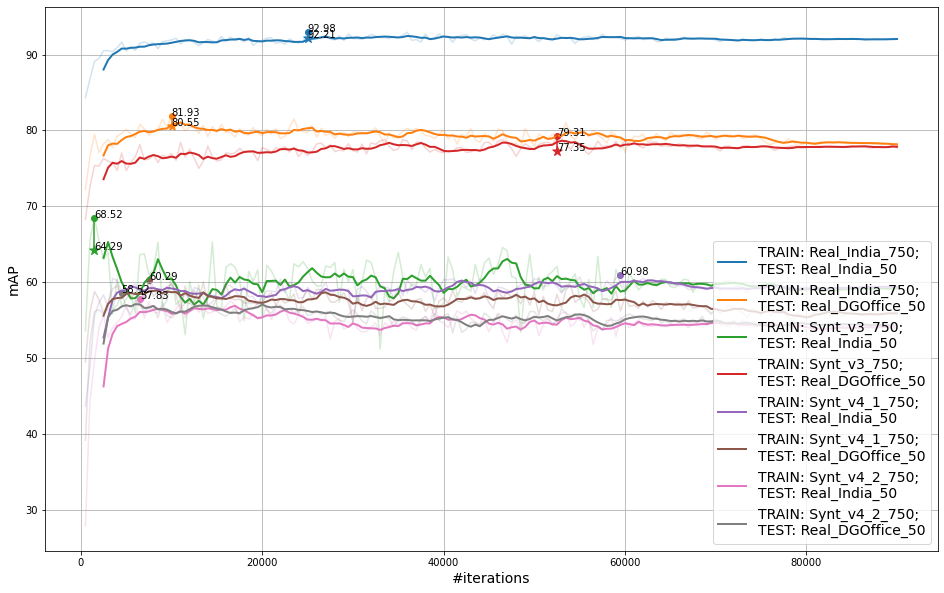

In [75]:
df["AP"] = [e["segm"]["AP"] for e in df.metrics]
df_test["AP"] = [e["segm"]["AP"] for e in df_test.metrics]
colors = iter(["red", "green", "blue", "purple"])
colors = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
tabular = defaultdict(list)
plt.figure(figsize=(16,10))
for train_identifier, test_identifier in itertools.product(train_identifiers, test_identifiers):
    df_cur = df[(df.train_identifier == train_identifier) & (df.test_identifier == test_identifier)]
    
    
    df_test_cur = df_test[(df_test.train_identifier == train_identifier) & (df_test.test_identifier == test_identifier)]
    
    df_cur = df_cur.sort_values(by="iteration_num")
    
    iterations = df_cur.iteration_num
    ap = df_cur["AP"]
    ap_mean = df_cur["AP"].rolling(window=5).mean()
    train_name = set_names_map.get(train_identifier, train_identifier)
    test_name = set_names_map.get(test_identifier, test_identifier)

    c = next(colors)
    plt.plot(iterations, ap,color=c, alpha=0.2)
    plt.plot(iterations, ap_mean, color=c, 
             label=f"TRAIN: {train_name};\nTEST: {test_name}",
             linewidth=2)
    
    best_ind = np.argmax(ap)
    best_ap = list(ap)[best_ind]
    best_iter = list(iterations)[best_ind]
    plt.scatter(best_iter, best_ap, c=c)
    plt.text(best_iter, best_ap, str(np.round(best_ap,2)))
    
    
    if (train_identifier, test_identifier) in test_ap_map:
        test_ap = test_ap_map[(train_identifier, test_identifier)]
        plt.scatter(best_iter, test_ap, c=c, marker="*", s=100)
        plt.plot([best_iter, best_iter], [test_ap, best_ap], c=c)
        plt.text(best_iter, test_ap, str(test_ap))
    
    print(f"best iter is: {best_iter} for label: TRAIN: {train_name}; TEST: {test_name} with mAP: {np.round(best_ap, 2)}")
    
    tabular["train"].append(train_identifier)
    tabular["test"].append(test_identifier)
    tabular["map"].append(np.round(best_ap,2))
    
plt.xlabel("#iterations", fontdict={"size":14})
plt.ylabel("mAP", fontdict={"size":14})
plt.grid()
plt.legend(loc=4, prop={'size': 14})
plt.show()

In [70]:
df_tabular = pd.DataFrame(tabular)
df_tabular

,train,test,map
0,expo_real_1000_0_750,Expo_Real_1000_750-800,92.98
1,expo_real_1000_0_750,Expo_Real_DataGen_Office_250_0-50,81.93
2,expo_synt_0_750,Expo_Real_1000_750-800,68.52
3,expo_synt_0_750,Expo_Real_DataGen_Office_250_0-50,79.31
4,expo_synt_v4_large_0_750,Expo_Real_1000_750-800,60.98
5,expo_synt_v4_large_0_750,Expo_Real_DataGen_Office_250_0-50,60.29
6,expo_synt_v4_2_0_750,Expo_Real_1000_750-800,57.83
7,expo_synt_v4_2_0_750,Expo_Real_DataGen_Office_250_0-50,58.52


In [71]:
get_pretty_name = lambda name: set_names_map.get(name, name)
df_tabular["train"] = df_tabular["train"].apply(get_pretty_name)
df_tabular["test"] = df_tabular["test"].apply(get_pretty_name)
df_tabular

,train,test,map
0,Real_India_750,Real_India_50,92.98
1,Real_India_750,Real_DGOffice_50,81.93
2,Synt_v3_750,Real_India_50,68.52
3,Synt_v3_750,Real_DGOffice_50,79.31
4,Synt_v4_1_750,Real_India_50,60.98
5,Synt_v4_1_750,Real_DGOffice_50,60.29
6,Synt_v4_2_750,Real_India_50,57.83
7,Synt_v4_2_750,Real_DGOffice_50,58.52


In [74]:
pd.pivot_table(df_tabular, index="train", columns="test")

map              
test           Real_DGOffice_50 Real_India_50
train                                        
Real_India_750            81.93         92.98
Synt_v3_750               79.31         68.52
Synt_v4_1_750             60.29         60.98
Synt_v4_2_750             58.52         57.83

# Train: sytn_750; Inference; Real_India_50

In [73]:
# weights = "/expo_markers/training_logs/expo_synt_0_750/model_0033999.pth"
# DG_TEST_SET_PATH = "/expo_markers/expo_datasets/Expo_Real_1000/"
# DG_TEST_SET_INDS = "800-1000"
# base_save_path = "/expo_markers/visual_results_train_synt_test_india"
# predict_on_set(weights, DG_TEST_SET_PATH, DG_TEST_SET_INDS, sample_size=10, base_save_path=base_save_path)